In [17]:
!pwd

/Users/somang/Desktop/mymac/빅데이터/청주원도심/analysis/Data-Analysis


In [18]:
!ls

Analysis_1.ipynb
README.md
충청북도 청주시 개별주택가격_20220101.csv


In [15]:
import pandas as pd
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

### 인구성장율

In [19]:
filename = "./../../data/22.청주시_주민등록인구현황.csv"
file = pd.read_csv(filename)
df = pd.DataFrame(file)
df.head(5)

adm_cd            adm_nm    year  m_pop  fm_pop
0  4311131000  충청북도 청주시 상당구 낭성면  201701   1232    1140
1  4311132000  충청북도 청주시 상당구 미원면  201701   2757    2636
2  4311133000  충청북도 청주시 상당구 가덕면  201701   2259    2066
3  4311134000  충청북도 청주시 상당구 남일면  201701   3901    3746
4  4311135000  충청북도 청주시 상당구 문의면  201701   2383    2165

In [20]:
loc_list = ["충청북도 청주시 상당구 중앙동",
           "충청북도 청주시 상당구 성안동",
           "충청북도 청주시 흥덕구 복대1동",
           "충청북도 청주시 흥덕구 복대2동",
           "충청북도 청주시 서원구 사창동",
           "충청북도 청주시 상당구 용암동"]


In [21]:
pop_list_2017 = []
pop_list_2022 = []
for i in range(len(loc_list)):
    cur = df.loc[df.adm_nm == loc_list[i]]
    cur.index= range(0,len(cur))
    cur['year'] = cur['year'].apply(lambda _: str(_))

    test_df = cur[cur['year'].str.contains('2017')]
    all_pop_2017 = sum(test_df.m_pop) + sum(test_df.fm_pop)
    print(loc_list[i])
    print("2017 : ", all_pop_2017)
    pop_list_2017.append(all_pop_2017)
    
    test_df = cur[cur['year'].str.contains('2022')]
    all_pop_2022 = sum(test_df.m_pop) + sum(test_df.fm_pop)
    print(loc_list[i])
    print("2022 : ",all_pop_2022)
    pop_list_2022.append(all_pop_2022)


충청북도 청주시 상당구 중앙동
2017 :  77649
충청북도 청주시 상당구 중앙동
2022 :  82080
충청북도 청주시 상당구 성안동
2017 :  75388
충청북도 청주시 상당구 성안동
2022 :  80813
충청북도 청주시 흥덕구 복대1동
2017 :  641022
충청북도 청주시 흥덕구 복대1동
2022 :  601726
충청북도 청주시 흥덕구 복대2동
2017 :  216476
충청북도 청주시 흥덕구 복대2동
2022 :  191779
충청북도 청주시 서원구 사창동
2017 :  194933
충청북도 청주시 서원구 사창동
2022 :  176090


<ipython-input-21-3ce57fe3cdaf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur['year'] = cur['year'].apply(lambda _: str(_))


AttributeError: Can only use .str accessor with string values!

### 상권정보

In [32]:
filename = "./../../data/18.청주시_상권정보.csv"
file = pd.read_csv(filename)
df = pd.DataFrame(file)
df.head(10)

com_lc_cd com_lc_nm com_mc_cd   com_mc_nm com_sc_cd      com_sc_nm ksic_cd  \
0         R     학문/교육       R04       학원-어학    R04A01      학원-외국어/어학  P85502   
1         Q        음식       Q12      커피점/카페    Q12A01    커피전문점/카페/다방  I56220   
2         D        소매       D07  가정/주방/인테리어    D07A15  유리/페인트/철물건축자재  G47519   
3         D        소매       D15        가구소매    D15A01         일반가구소매  G47520   
4         R     학문/교육       R04       학원-어학    R04A01      학원-외국어/어학  P85502   
5         F     생활서비스       F01     이/미용/건강    F01A01          여성미용실  S96112   
6         F     생활서비스       F15        주택수리    F15A01         주택수리종합  S95399   
7         F     생활서비스       F01     이/미용/건강    F01A01          여성미용실  S96112   
8         Q        음식       Q01          한식    Q01A02         갈비/삼겹살  I56111   
9         Q        음식       Q01          한식    Q01A01      한식/백반/한정식  I56111   

                 ksic_nm  adb_emd_cd adb_emd_nm  \
0                  외국어학원  4311259000  성화.개신.죽림동   
1               비알콜 음료점업  4311154500        성안동   
2  페인트, 유리 및 기타 건설자재 소매업  4311257000       수곡1동   
3                 가구 소매업  4311231000        남이면   
4                  외국어학원  4311454000     율량.사천동   
5                  두발미용업  4311257000       수곡1동   
6    그외 기타 개인 및 가정용품 수리업  4311252000       사직2동   
7                  두발미용업  4311374100       복대1동   
8                한식 음식점업  4311455000       오근장동   
9                한식 음식점업  4311167000        영운동   

                         road_address         lon        lat  
0           충청북도 청주시 서원구 복대로 7, (개신동)  127.446061  36.617928  
1          충청북도 청주시 상당구 대성로 38, (서운동)  127.493371  36.628602  
2  충청북도 청주시 서원구 매봉로 64, (수곡동, 산남주공3차)  127.478662  36.616083  
3    충청북도 청주시 서원구 남이면 청남로 1272, (척산리)  127.440092  36.562169  
4         충청북도 청주시 청원구 공항로 118, (율량동)  127.485764  36.667772  
5      충청북도 청주시 서원구 수영로23번길 21, (수곡동)  127.488365  36.616270  
6        충청북도 청주시 서원구 호국로 32-1, (사직동)  127.474882  36.631108  
7          충청북도 청주시 흥덕구 월명로 21, (복대동)  127.453185  36.636616  
8         충청북도 청주시 청원구 공항로 238, (주중동)  127.484006  36.678164  
9       충청북도 청주시 상당구 영운로37번길 9, (영운동)  127.495883  36.618798

In [23]:
df.com_lc_nm.drop_duplicates()

0         학문/교육
1            음식
2            소매
5         생활서비스
17     관광/여가/오락
40          부동산
54          스포츠
103          숙박
Name: com_lc_nm, dtype: object

In [33]:
# join함수를 이용하여 이어주고 contains 함수에 넣기
com_loc_list = ["중앙동","성안동","복대1동","복대2동"]
test = '|'.join(com_loc_list)
result = df[df['adb_emd_nm'].str.contains(test)]
result.head(10)

com_lc_cd com_lc_nm com_mc_cd   com_mc_nm com_sc_cd    com_sc_nm ksic_cd  \
1          Q        음식       Q12      커피점/카페    Q12A01  커피전문점/카페/다방  I56220   
7          F     생활서비스       F01     이/미용/건강    F01A01        여성미용실  S96112   
12         D        소매       D05        의복의류    D05A05        아동복판매  G47416   
21         Q        음식       Q09        유흥주점    Q09A01        호프/맥주  I56219   
35         D        소매       D10     건강/미용식품    D10A07          건강원  G47216   
36         D        소매       D05        의복의류    D05A10    한복/갈옷/민속옷  G47412   
50         D        소매       D05        의복의류    D05A02    캐쥬얼/스포츠의류  G47416   
56         F     생활서비스       F02    세탁/가사서비스    F02A01      세탁소/빨래방  S96912   
59         D        소매       D07  가정/주방/인테리어    D07A02         주방용품  G47592   
64         N  관광/여가/오락       N02    무도/유흥/가무    N02A01          노래방  R91223   

           ksic_nm  adb_emd_cd adb_emd_nm  \
1         비알콜 음료점업  4311154500        성안동   
7            두발미용업  4311374100       복대1동   
12  셔츠 및 기타 의복 소매업  4311374100       복대1동   
21          기타 주점업  4311154500        성안동   
35      건강보조식품 소매업  4311154500        성안동   
36          한복 소매업  4311154500        성안동   
50  셔츠 및 기타 의복 소매업  4311154500        성안동   
56         가정용 세탁업  4311374100       복대1동   
59   식탁 및 주방용품 소매업  4311154500        성안동   
64       노래연습장 운영업  4311374100       복대1동   

                               road_address         lon        lat  
1                충청북도 청주시 상당구 대성로 38, (서운동)  127.493371  36.628602  
7                충청북도 청주시 흥덕구 월명로 21, (복대동)  127.453185  36.636616  
12           충청북도 청주시 흥덕구 사직대로11번길 9, (복대동)  127.448401  36.634773  
21         충청북도 청주시 상당구 남사로140번길 6, (남문로2가)  127.490409  36.631851  
35          충청북도 청주시 상당구 상당로3번길 18-1, (석교동)  127.490050  36.628551  
36    충청북도 청주시 상당구 무심동로336번길 100-2, (남문로1가)  127.488456  36.631302  
50             충청북도 청주시 상당구 상당로 55, (남문로2가)  127.490343  36.633284  
56  충청북도 청주시 흥덕구 증안로 100, (복대동, 영조아름다운나날2차)  127.433369  36.635244  
59            충청북도 청주시 상당구 상당로1번길 22, (석교동)  127.489694  36.628361  
64           충청북도 청주시 흥덕구 진재로15번길 15, (복대동)  127.428974  36.632204

In [25]:
!pip install folium

You should consider upgrading via the '/Users/somang/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [26]:
import folium

from folium.plugins import MarkerCluster


m = folium.Map(
    location=[36.681404, 127.493130],
    zoom_start=15
)

coords = result[['lat', 'lon']]


marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['lat'], coords['lon']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)
m

### 기초생활수급자수

In [238]:
filename = "충청북도 청주시_국민기초생활보장수급자수_20221231.csv"
file = pd.read_csv(filename,encoding='cp949')
df = pd.DataFrame(file)
df

읍면동명  수급자수
0       충청북도 청주시 상당구 낭성면   103
1       충청북도 청주시 상당구 미원면   325
2       충청북도 청주시 상당구 가덕면   192
3       충청북도 청주시 상당구 남일면   216
4       충청북도 청주시 상당구 문의면   249
5       충청북도 청주시 상당구 중앙동   274
6       충청북도 청주시 상당구 성안동   469
7      충청북도 청주시 상당구 탑대성동   476
8       충청북도 청주시 상당구 영운동   802
9       충청북도 청주시 상당구 금천동  1278
10  충청북도 청주시 상당구 용담명암산성동   342
11     충청북도 청주시 상당구 용암1동  3377
12     충청북도 청주시 상당구 용암2동  1020
13      충청북도 청주시 서원구 남이면   343
14      충청북도 청주시 서원구 현도면   205
15     충청북도 청주시 서원구 사직1동   326
16     충청북도 청주시 서원구 사직2동   325
17      충청북도 청주시 서원구 사창동   774
18      충청북도 청주시 서원구 모충동   913
19      충청북도 청주시 서원구 산남동   759
20      충청북도 청주시 서원구 분평동   612
21     충청북도 청주시 서원구 수곡1동  1003
22     충청북도 청주시 서원구 수곡2동  2308
23  충청북도 청주시 서원구 성화개신죽림동  2300
24      충청북도 청주시 흥덕구 오송읍   705
25      충청북도 청주시 흥덕구 강내면   268
26      충청북도 청주시 흥덕구 옥산면   449
27    충청북도 청주시 흥덕구 운천신봉동   761
28     충청북도 청주시 흥덕구 복대1동   942
29     충청북도 청주시 흥덕구 복대2동  1035
30      충청북도 청주시 흥덕구 가경동  1627
31     충청북도 청주시 흥덕구 봉명1동   597
32   충청북도 청주시 흥덕구 봉명2송정동  1099
33     충청북도 청주시 흥덕구 강서1동   591
34     충청북도 청주시 흥덕구 강서2동    98
35      충청북도 청주시 청원구 내수읍  1103
36      충청북도 청주시 청원구 오창읍  1001
37      충청북도 청주시 청원구 북이면   194
38      충청북도 청주시 청원구 우암동   889
39     충청북도 청주시 청원구 내덕1동   499
40     충청북도 청주시 청원구 내덕2동   594
41    충청북도 청주시 청원구 율량사천동  1349
42     충청북도 청주시 청원구 오근장동   870

In [245]:
loc_list = ["충청북도 청주시 상당구 중앙동",
           "충청북도 청주시 상당구 성안동",
           "충청북도 청주시 흥덕구 복대1동",
           "충청북도 청주시 흥덕구 복대2동",
           "충청북도 청주시 서원구 사창동",
           "충청북도 청주시 상당구 용암동"]

In [246]:
df.loc[df['읍면동명'] == loc_list[0]]

읍면동명  수급자수
5  충청북도 청주시 상당구 중앙동   274

In [287]:
# join함수를 이용하여 이어주고 contains 함수에 넣기
test = '|'.join(loc_list)
result = df[df['읍면동명'].str.contains(test)]
result['읍면동명'] = result['읍면동명'].str.replace('충청북도 청주시 상당구 ','')
result['읍면동명'] = result['읍면동명'].str.replace('충청북도 청주시 흥덕구 ',' ')
result['읍면동명'] = result['읍면동명'].str.replace('충청북도 청주시 서원구 ',' ')
result

<ipython-input-287-43592533c929>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['읍면동명'] = result['읍면동명'].str.replace('충청북도 청주시 상당구 ','')
<ipython-input-287-43592533c929>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['읍면동명'] = result['읍면동명'].str.replace('충청북도 청주시 흥덕구 ',' ')
<ipython-input-287-43592533c929>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

읍면동명  수급자수
5     중앙동   274
6     성안동   469
17    사창동   774
28   복대1동   942
29   복대2동  1035

In [288]:
import matplotlib
import platform

print(platform.system()) # 플랫폼 확인

# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

Darwin


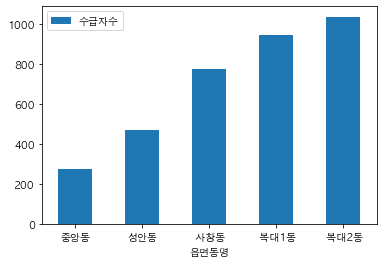

In [289]:
result.plot.bar(x='읍면동명', y='수급자수', rot=0)


In [297]:
pop_list_2017

[77649, 75388, 641022, 216476, 194933]

In [ ]:
result.insert(2,'2017 인구',pop_list_2017)

In [301]:
result.insert(2,'2022 인구',pop_list_2022)

In [302]:
result

읍면동명  수급자수  2022 인구  2017 인구
5     중앙동   274    82080    77649
6     성안동   469    80813    75388
17    사창동   774   601726   641022
28   복대1동   942   191779   216476
29   복대2동  1035   176090   194933

In [305]:
result['수급자수']/result['2022 인구']*10000

5     33.382066
6     58.035217
17    12.862997
28    49.119038
29    58.776762
dtype: float64

### 자전거도로

In [326]:
filename = "청주시 자전거도로 현황_20191010.xlsx"
file = pd.read_excel(filename)
df = pd.DataFrame(file)
df.head(5)

일련\n번호  1. 기본사항  Unnamed: 2      Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0     NaN      노선명          기점             NaN          종점         NaN   
1     NaN      NaN  시설물,\n교차로명              지번  시설물,\n교차로명          지번   
2     NaN       총계         NaN             NaN         NaN         NaN   
3     1.0  무심천자전거길         NaN      정상동 368-24       고은사거리   고은리 461-2   
4     2.0   오천자전거길         NaN  오송읍 서평리 693-20         NaN  정상동 368-24   

  Unnamed: 6  Unnamed: 7         Unnamed: 8 2. 자전거도로 현황 Unnamed: 10  \
0      주요경유지  노선연장\n(km)  총연장(m)\n(a+c+d+e)     전용도로(a)         NaN   
1        NaN         NaN                NaN     연장\n(m)     폭원\n(m)   
2        NaN      582.05             530901       76455         NaN   
3   청주시아동복지관       15.41              15406       15406           4   
4   청주시하수처리장       44.56              26955       26955     3.0~4.0   

  Unnamed: 11  Unnamed: 12  Unnamed: 13       Unnamed: 14       Unnamed: 15  \
0  자전거우선도로(c)          NaN  분리형 겸용도로(d)               NaN               NaN   
1     연장\n(m)  도로\n폭원\n(m)      연장\n(m)  최소자전거\n도로폭원\n(m)  최대자전거\n도로폭원\n(m)   
2       20082          NaN       284705               NaN               NaN   
3         NaN          NaN          NaN               NaN               NaN   
4         NaN          NaN          NaN               NaN               NaN   

     Unnamed: 16    Unnamed: 17   Unnamed: 18    Unnamed: 19    Unnamed: 20  \
0            NaN            NaN  비분리형 겸용도로(e)            NaN            NaN   
1  최소보도\n폭원\n(m)  최대보도\n폭원\n(m)       연장\n(m)  최소도로\n폭원\n(m)  최대도로\n폭원\n(m)   
2            NaN            NaN        149659            NaN            NaN   
3            NaN            NaN           NaN            NaN            NaN   
4            NaN            NaN           NaN            NaN            NaN   

     Unnamed: 21    Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25  \
0            NaN            NaN        이용목적    보도(비분리형)         NaN   
1  최소유효\n폭원\n(m)  최대유효\n폭원\n(m)         NaN          색상          재질   
2            NaN            NaN         NaN         NaN         NaN   
3            NaN            NaN        관광레저       암적/검정         아스콘   
4            NaN            NaN        관광레저          암적         아스콘   

  Unnamed: 26 Unnamed: 27  Unnamed: 28  Unnamed: 29  
0       자전거도로         NaN          NaN          NaN  
1          색상          재질          NaN          NaN  
2         NaN         NaN          NaN          NaN  
3         NaN         NaN          NaN          NaN  
4         NaN         NaN          NaN          NaN

### 개별주택가격

In [35]:

filename = "./../../충청북도 청주시 개별주택가격_20220101.csv"
file = pd.read_csv(filename,encoding='cp949')
df = pd.DataFrame(file)
df.head(10)

고유번호       법정동코드        법정동명  특수지구분코드 특수지구분명    지번     건축물대장고유번호  \
0  4.311110e+18  4311110100  청주시 상당구 영동        1     일반   2-1  4.311110e+18   
1  4.311110e+18  4311110100  청주시 상당구 영동        1     일반   2-2  4.311110e+18   
2  4.311110e+18  4311110100  청주시 상당구 영동        1     일반   2-3  4.311110e+18   
3  4.311110e+18  4311110100  청주시 상당구 영동        1     일반   2-4  4.311110e+18   
4  4.311110e+18  4311110100  청주시 상당구 영동        1     일반   4-2  4.311110e+18   
5  4.311110e+18  4311110100  청주시 상당구 영동        1     일반   4-5  4.311110e+18   
6  4.311110e+18  4311110100  청주시 상당구 영동        1     일반   4-6  4.311110e+18   
7  4.311110e+18  4311110100  청주시 상당구 영동        1     일반     6  4.311110e+18   
8  4.311110e+18  4311110100  청주시 상당구 영동        1     일반   7-4  4.311110e+18   
9  4.311110e+18  4311110100  청주시 상당구 영동        1     일반   7-6  4.311110e+18   

   기준년도  기준월  동코드  동명  토지대장면적  산정대지면적  건물전체연면적  건물산정연면적       주택가격 표준지여부  \
0  2022    1    1   1   132.5   60.49   145.26    66.74   45900000     N   
1  2022    1    2   2   256.9  256.90    92.43    92.43  190000000     N   
2  2022    1    1   1   444.9  222.89   173.81   173.81  151000000     N   
3  2022    1    1   1   139.9  139.90   140.13   140.13   73400000     N   
4  2022    1    1   1   392.8  193.10   249.60   122.70  159000000     N   
5  2022    1    1   1   358.8  358.80   607.13   607.13  461000000     N   
6  2022    1    1   1   137.9  137.90    74.38    74.38   39400000     N   
7  2022    1    1   1   317.3  317.30   480.99   480.99  147000000     Y   
8  2022    1    1   1   148.1  148.10    84.73    84.73   98400000     N   
9  2022    1    1   1   170.0  170.00    79.53    79.53   55200000     N   

      데이터기준일자  
0  2022-01-01  
1  2022-01-01  
2  2022-01-01  
3  2022-01-01  
4  2022-01-01  
5  2022-01-01  
6  2022-01-01  
7  2022-01-01  
8  2022-01-01  
9  2022-01-01

In [14]:
df[df['법정동명'].str.contains("성안")]

Empty DataFrame
Columns: [고유번호, 법정동코드, 법정동명, 특수지구분코드, 특수지구분명, 지번, 건축물대장고유번호, 기준년도, 기준월, 동코드, 동명, 토지대장면적, 산정대지면적, 건물전체연면적, 건물산정연면적, 주택가격, 표준지여부, 데이터기준일자]
Index: []

In [12]:
df['법정동명'].drop_duplicates()

0                 청주시 상당구 영동
158            청주시 상당구 북문로1가
192            청주시 상당구 북문로2가
298            청주시 상당구 북문로3가
335            청주시 상당구 남문로1가
526            청주시 상당구 남문로2가
574              청주시 상당구 문화동
638              청주시 상당구 서운동
930              청주시 상당구 서문동
1114             청주시 상당구 남주동
1375             청주시 상당구 석교동
1803              청주시 상당구 수동
2621              청주시 상당구 탑동
3142             청주시 상당구 대성동
3520             청주시 상당구 영운동
4389             청주시 상당구 금천동
5702             청주시 상당구 용담동
6145             청주시 상당구 명암동
6176             청주시 상당구 산성동
6259             청주시 상당구 용암동
7920             청주시 상당구 용정동
8573             청주시 상당구 방서동
8677             청주시 상당구 지북동
8779             청주시 상당구 운동동
8884             청주시 상당구 월오동
9022         청주시 상당구 낭성면 관정리
9190         청주시 상당구 낭성면 귀래리
9240         청주시 상당구 낭성면 추정리
9404         청주시 상당구 낭성면 호정리
9517         청주시 상당구 낭성면 이목리
9609         청주시 상당구 낭성면 문박리
9665         청주시 상당구 낭성면 인경리
9733         청주시 상당구 낭성면 지산리
9840         청주시 상당구 낭성면 갈산리
9888         청